### Activity 5 - Becoming a Data Scientist - Naive Bayes

In [2]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('fivethirtyeight')
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('pima_indians_diabetes.csv')

In [4]:
df.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,tricepts_skin_fold_thickness,2_hour_serum_insulin,body_mass_index,diabetes_pedigree_function,age,class_variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
y = df['class_variable']
x = df[['times_pregnant', 'plasma_glucose_concentration', 'diastolic_blood_pressure', 'tricepts_skin_fold_thickness',
       '2_hour_serum_insulin', 'body_mass_index', 'diabetes_pedigree_function', 'age']]

Just for fun, I want to look at the feature importance of all the columns

In [6]:
from sklearn.feature_selection import SelectKBest

In [7]:
test = SelectKBest(k='all')

In [8]:
fit = test.fit(x, y)

In [9]:
features=pd.DataFrame()
features['feature'] = x.columns
features['importance'] = fit.scores_
features.sort(['importance'],ascending=False)

/Users/jeffreyherman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,feature,importance
1,plasma_glucose_concentration,213.161752
5,body_mass_index,71.772072
7,age,46.140611
0,times_pregnant,39.670227
6,diabetes_pedigree_function,23.871300
4,2_hour_serum_insulin,13.281108
3,tricepts_skin_fold_thickness,4.304381
2,diastolic_blood_pressure,3.256950


Plasma Glucose Concentration is far and away the most important! As a refresher the plot is below

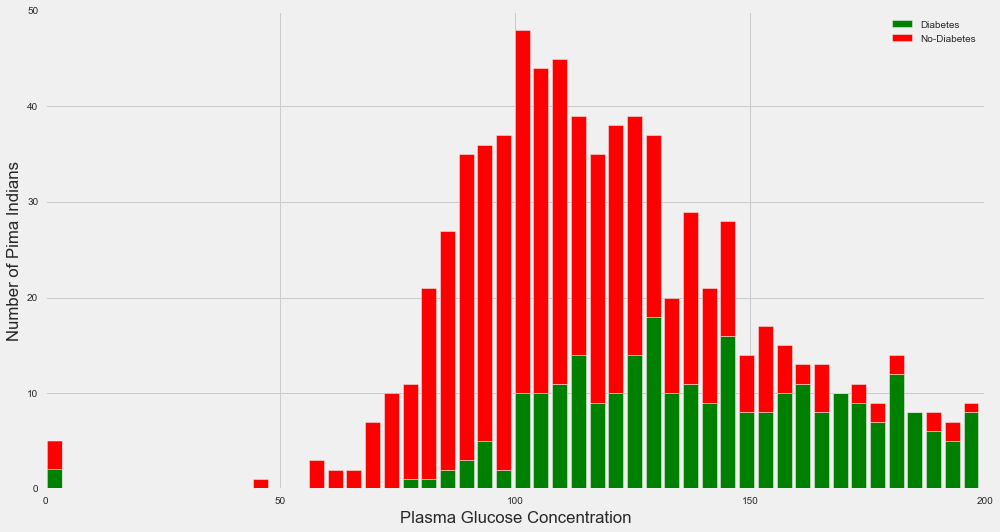

In [10]:
figure = plt.figure(figsize=(15,8))
plt.hist([df[df['class_variable']==1]['plasma_glucose_concentration'], 
          df[df['class_variable']==0]['plasma_glucose_concentration']], stacked=True,
         color = ['g','r'],bins = 50,label = ['Diabetes','No-Diabetes'])
plt.xlabel('Plasma Glucose Concentration')
plt.ylabel('Number of Pima Indians')
plt.legend()

In [11]:
from sklearn.cross_validation import train_test_split
features_train, features_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [14]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [122]:
j = 0
accuracy = 0 
precision = 0
recall = 0
while j < 1000:
    features_train, features_test, labels_train, labels_test = train_test_split(x, y, test_size=0.30)
    clf.fit(features_train, labels_train)
    pred = clf.predict(features_test)
    acc = accuracy_score(labels_test, pred)
    j += 1
    accuracy = accuracy + acc
    precision = precision + precision_score(labels_test, pred)
    recall = recall + recall_score(labels_test, pred)
    
print "Accuracy: ", accuracy / 1000.0
print "Precision: ", precision / 1000.0
print "Recall: ", recall / 1000.0

Accuracy:  0.754428571429
Precision:  0.665899735089
Recall:  0.60157685872


Next, I wanted to see how the accuracy, precision, and recall scores change as I subtract features

In [86]:
scores = {}
jj = 8
listy = ['plasma_glucose_concentration', 'body_mass_index', 'age', 'times_pregnant', 'diabetes_pedigree_function', 
         '2_hour_serum_insulin', 'tricepts_skin_fold_thickness', 'diastolic_blood_pressure']
while jj > 0:
    x_1 = df[listy]
    j=0
    accuracy = 0 
    precision = 0
    recall = 0
    while j < 1000:
        features_train, features_test, labels_train, labels_test = train_test_split(x_1, y, test_size=0.30)
        clf.fit(features_train, labels_train)
        pred = clf.predict(features_test)
        acc = accuracy_score(labels_test, pred)
        j = j + 1
        accuracy = accuracy + acc
        precision = precision + precision_score(labels_test, pred)
        recall = recall + recall_score(labels_test, pred)
    scores[str(jj)] = accuracy / 1000.0, precision / 1000.0, recall / 1000.0
    jj = jj - 1
    listy.pop()
print scores

{'1': (0.74656277056277165, 0.71543704834875954, 0.46425056328115688), '3': (0.76512987012986977, 0.70422938351692388, 0.56551399879301645), '2': (0.76360606060606129, 0.72319392385116799, 0.52377778463801716), '5': (0.75930303030303148, 0.67725751862145001, 0.59528044937550484), '4': (0.75174025974026049, 0.66910772204961078, 0.57937759951631096), '7': (0.75537229437229447, 0.67048282225559108, 0.58686075686198913), '6': (0.75616883116883238, 0.67592568099899464, 0.58072079630053397), '8': (0.75286580086580113, 0.6612270066648297, 0.5987593961250165)}


In [101]:
df1 = pd.DataFrame.from_dict(scores, 'index')
df1['number_of_features'] = df1.index
df1.columns = ['accuracy', 'precision', 'recall', 'number_of_features']

In [95]:
df1.columns = ['Accuracy', 'Precision', 'Recall']

In [116]:
df1.head()

,accuracy,precision,recall,number_of_features
1,0.746563,0.715437,0.464251,1
3,0.765130,0.704229,0.565514,3
2,0.763606,0.723194,0.523778,2
5,0.759303,0.677258,0.595280,5
4,0.751740,0.669108,0.579378,4


In [120]:
df1.sort_index(inplace = True)
df1.head()

,accuracy,precision,recall,number_of_features
1,0.746563,0.715437,0.464251,1
2,0.763606,0.723194,0.523778,2
3,0.765130,0.704229,0.565514,3
4,0.751740,0.669108,0.579378,4
5,0.759303,0.677258,0.595280,5


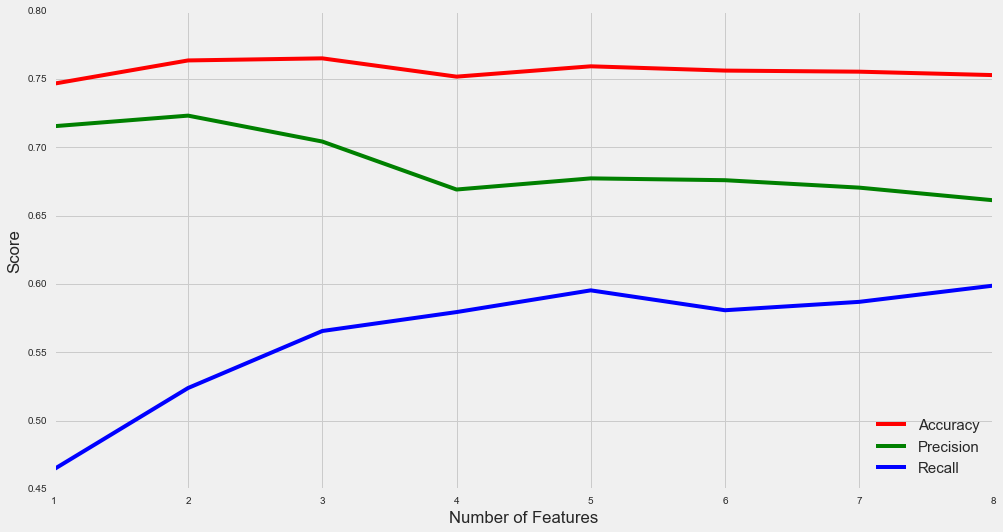

In [121]:
plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.plot(df1['number_of_features'], df1['accuracy'], c='red')
ax.plot(df1['number_of_features'], df1['precision'], c='green')
ax.plot(df1['number_of_features'], df1['recall'], c='blue')
ax.set_xlabel('Number of Features')
ax.set_ylabel('Score')
ax.legend(('Accuracy','Precision', 'Recall'),loc='best',fontsize=15,)

As I decreased featues the accuracy stayed about the same, the precision increased, and the recall decreased.